# Cassification: k-Nearest Neighbors

## Data import

In [1]:
import pandas as pd
df = pd.read_csv('telemarketing_train_preprocess.csv')

In [2]:
df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,target
0,1.444850,-0.746982,-0.571300,-3.969061,1.366417,-1.706389,-2.254135,1.860592,-1.400757,-1.031304,...,0,0,0,0,0,1,0,0,1,1
1,1.082169,0.100012,-0.571300,0.252494,-0.378985,-1.706389,-0.979221,-0.075950,-1.187102,-1.031304,...,0,0,1,0,0,0,0,1,0,1
2,0.447476,-0.363501,0.974844,0.252494,-0.378985,0.910934,-0.174453,0.892321,0.854483,0.901546,...,0,0,0,0,0,1,0,1,0,0
3,-0.731238,-0.200104,-0.184764,0.252494,-0.378985,0.728330,0.745760,0.830517,0.795410,0.429467,...,0,0,0,0,1,0,0,1,0,0
4,-0.731238,2.884420,-0.184764,0.252494,-0.378985,-0.002086,-0.582693,-0.323168,0.333873,0.490545,...,0,1,0,0,0,0,0,1,0,0


## Exploratory Data Analysis

In [3]:
#gives information about the data types,columns, null value counts, memory usage etc
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            15000 non-null  float64
 1   duration                       15000 non-null  float64
 2   campaign                       15000 non-null  float64
 3   pdays                          15000 non-null  float64
 4   previous                       15000 non-null  float64
 5   emp.var.rate                   15000 non-null  float64
 6   cons.price.idx                 15000 non-null  float64
 7   cons.conf.idx                  15000 non-null  float64
 8   euribor3m                      15000 non-null  float64
 9   nr.employed                    15000 non-null  float64
 10  marital_divorced               15000 non-null  int64  
 11  marital_married                15000 non-null  int64  
 12  marital_single                 15000 non-null 

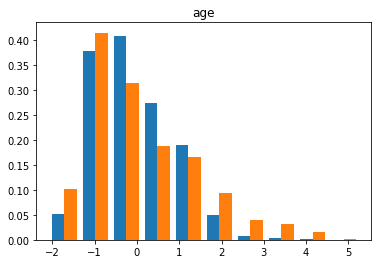

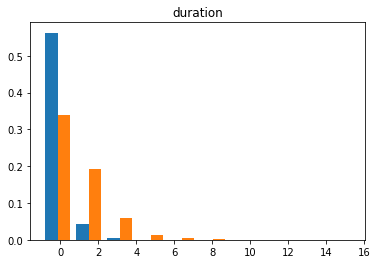

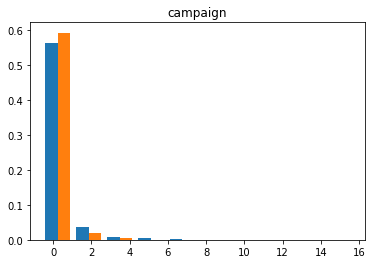

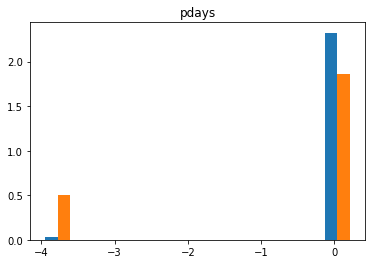

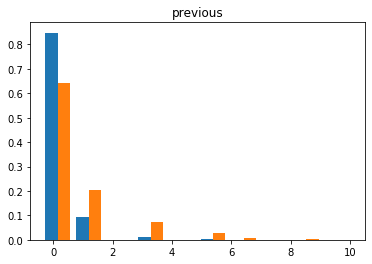

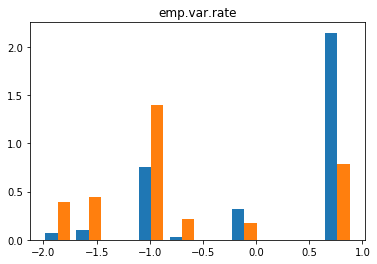

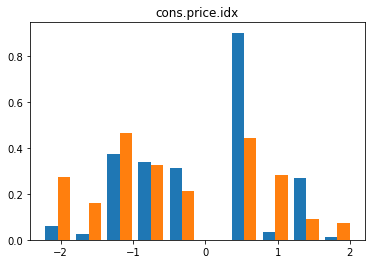

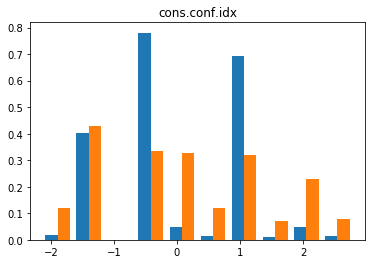

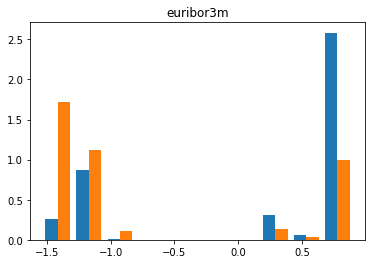

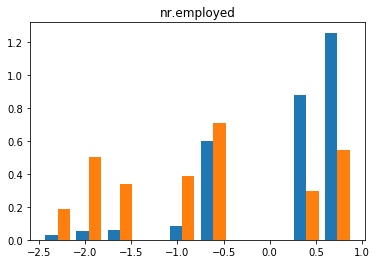

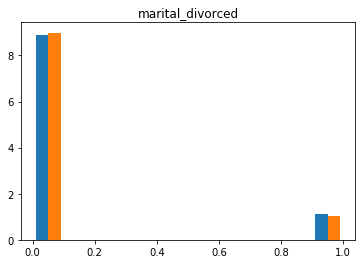

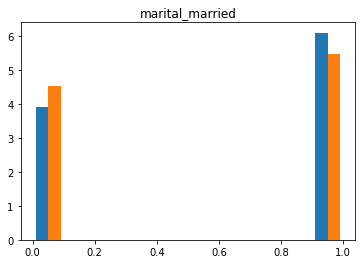

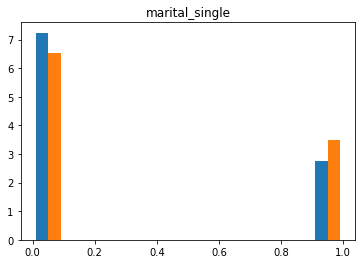

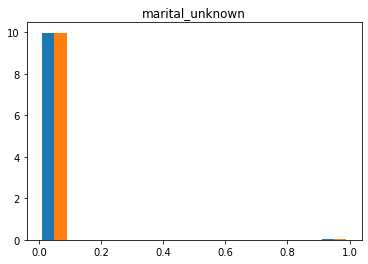

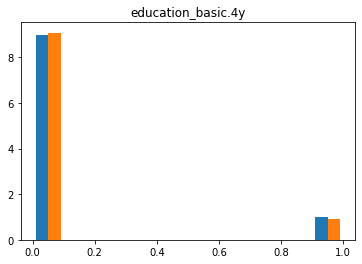

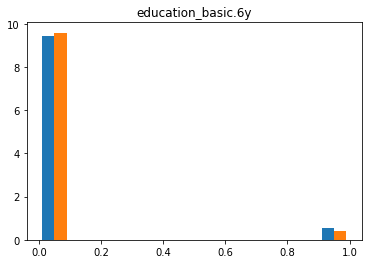

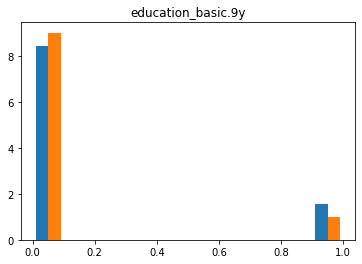

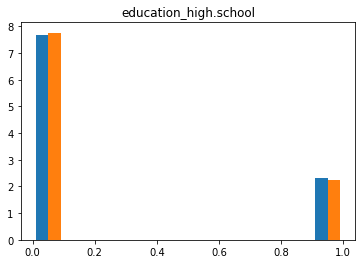

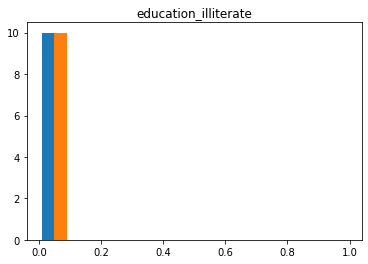

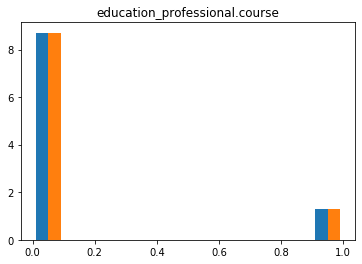

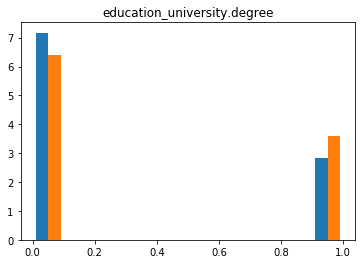

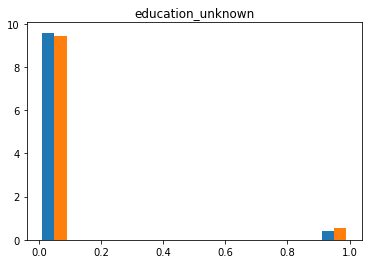

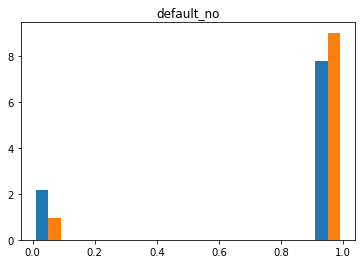

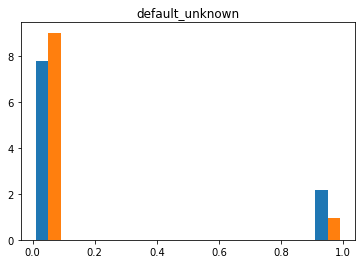

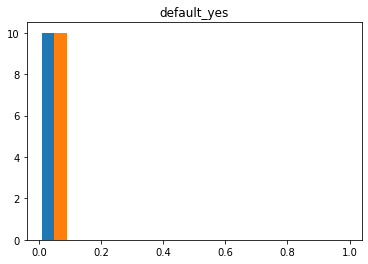

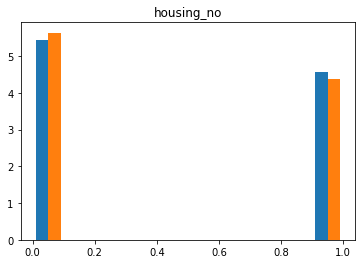

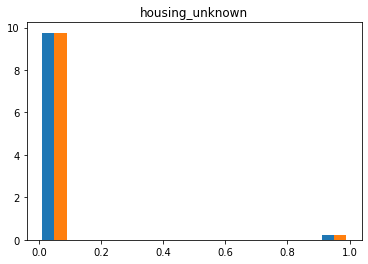

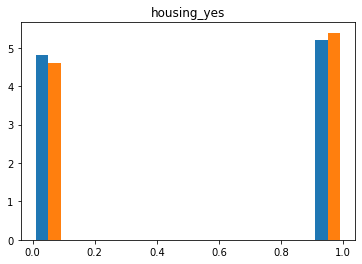

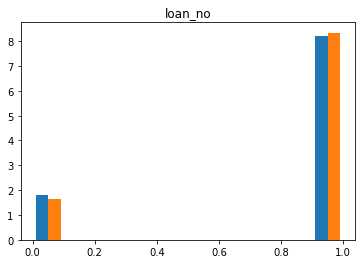

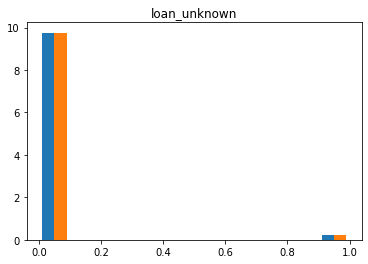

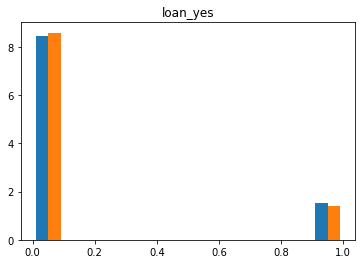

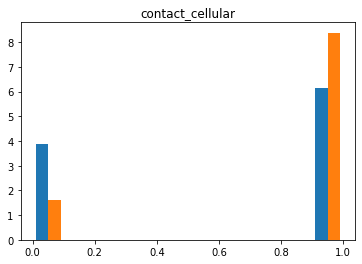

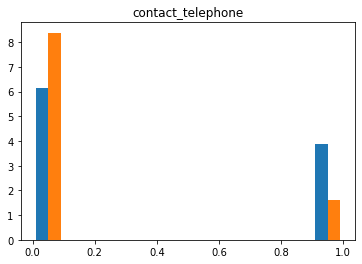

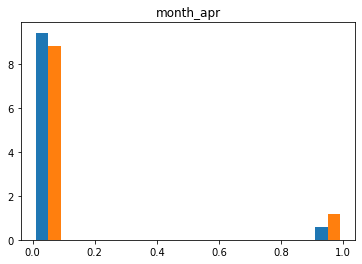

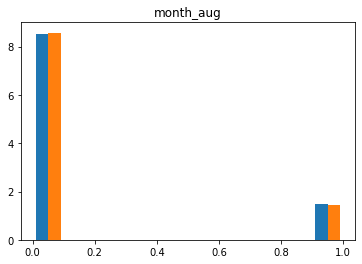

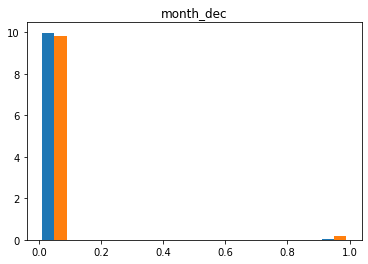

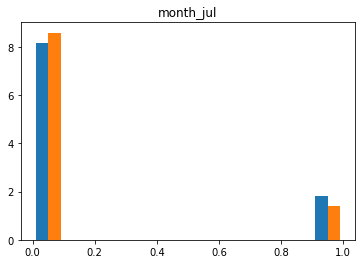

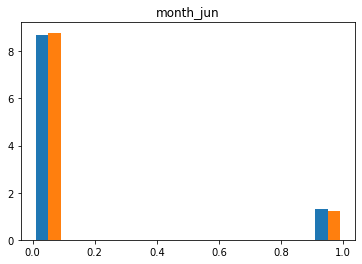

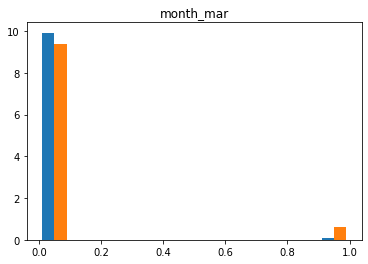

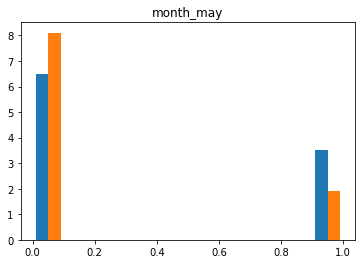

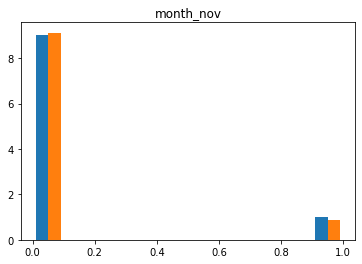

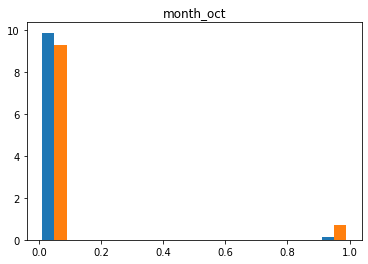

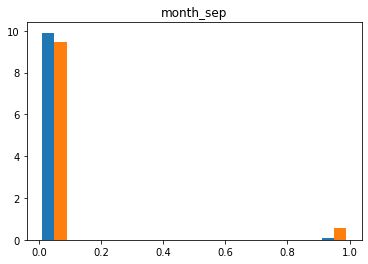

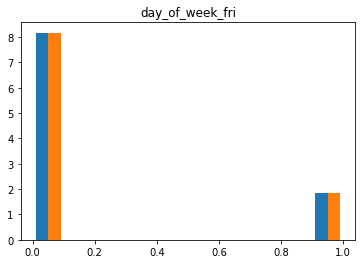

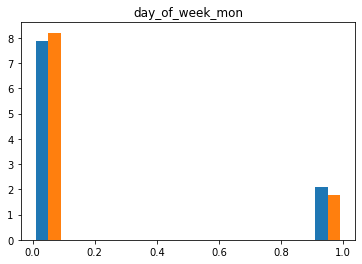

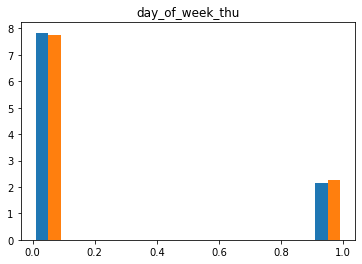

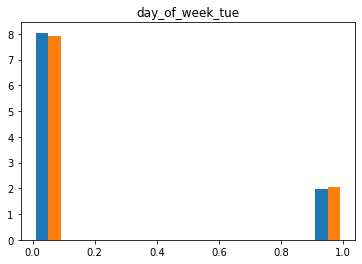

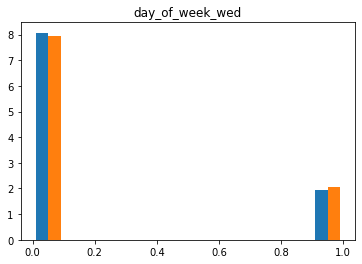

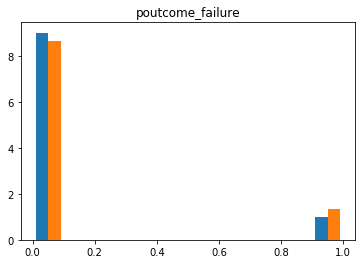

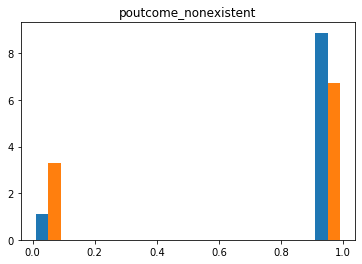

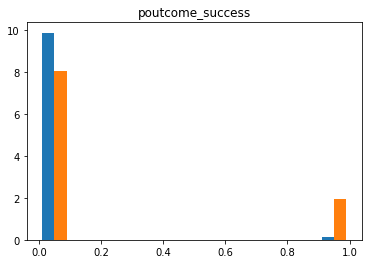

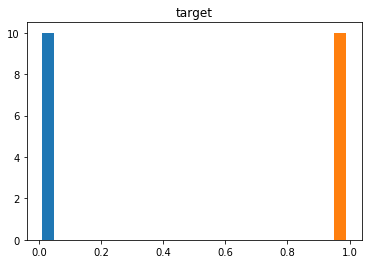

In [37]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

X=df

X0 = X[X['target']==0]
X1 = X[X['target']==1]


fig = plt.figure()
for i in X.columns :
    plt.hist([X0[i],X1[i]],density=True)
    plt.title(i)
    plt.show()


target
0    11552
1     3448
dtype: int64


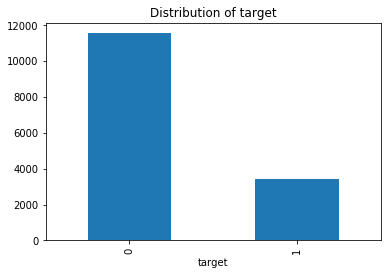

In [38]:
#Print class freq. through pandas: we group the data by the column target and we count the number of rows 
target_dist=df.groupby('target').size()
print(target_dist)

#some imports to plot 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Visualize Class Counts
target_dist.plot.bar(x='',y='',title='Distribution of target')

## Data Preparation 

### Separate Train/Test sets

In [39]:
df

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,target
0,1.444850,-0.746982,-0.571300,-3.969061,1.366417,-1.706389,-2.254135,1.860592,-1.400757,-1.031304,...,0,0,0,0,0,1,0,0,1,1
1,1.082169,0.100012,-0.571300,0.252494,-0.378985,-1.706389,-0.979221,-0.075950,-1.187102,-1.031304,...,0,0,1,0,0,0,0,1,0,1
2,0.447476,-0.363501,0.974844,0.252494,-0.378985,0.910934,-0.174453,0.892321,0.854483,0.901546,...,0,0,0,0,0,1,0,1,0,0
3,-0.731238,-0.200104,-0.184764,0.252494,-0.378985,0.728330,0.745760,0.830517,0.795410,0.429467,...,0,0,0,0,1,0,0,1,0,0
4,-0.731238,2.884420,-0.184764,0.252494,-0.378985,-0.002086,-0.582693,-0.323168,0.333873,0.490545,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0.991498,-0.146750,-0.571300,0.252494,-0.378985,0.728330,0.745760,0.830517,0.794858,0.429467,...,0,0,0,0,1,0,0,1,0,0
14996,1.172839,-0.440197,6.772887,0.252494,-0.378985,0.910934,0.618604,-0.467378,0.852827,0.901546,...,0,0,0,0,1,0,0,1,0,0
14997,0.084795,-0.446866,0.974844,0.252494,1.366417,-1.036841,-1.096339,-1.188431,-1.195936,-0.739913,...,0,1,0,0,0,0,1,0,0,0
14998,-0.549897,-0.716970,0.201772,0.252494,-0.378985,0.910934,-0.174453,0.892321,0.854483,0.901546,...,0,1,0,0,0,0,0,1,0,0


In [40]:
#Separate X and y (explanatory variables and target variable)
X = df.iloc[:,0:-1]
y = df.iloc[:,-1] #[-1]]

#X.head()
y.head()

0    1
1    1
2    0
3    0
4    0
Name: target, dtype: int64

In [41]:
from sklearn.model_selection import train_test_split

#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size =0.30, #by default is 75%-25%
                                                    #shuffle is set True by default,
                                                    stratify=y,
                                                    random_state= 123) #fix random seed for replicability

print(X_train.shape,X_test.shape)

(10500, 51) (4500, 51)


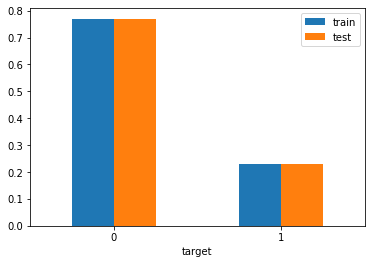

In [42]:
y_train_dist=y_train.groupby(y_train.iloc[:]).size()/y_train.size
y_test_dist=y_test.groupby(y_test.iloc[:]).size()/y_test.size

train_test_dist = pd.DataFrame({'train': y_train_dist, 'test': y_test_dist})
ax = train_test_dist.plot.bar(rot=0) # rotation of the labels

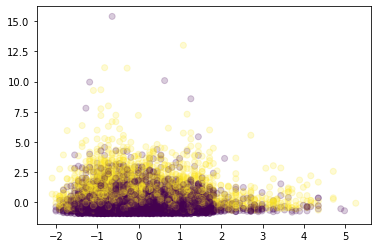

In [43]:
import matplotlib.pyplot as plt

x = X_train.iloc[:,0]
y = X_train.iloc[:,1]

plt.scatter(x, y,alpha=0.2,c=y_train )
plt.show()

# A first model: K-Nearest Neighbor

The K-Nearest Neighbor classification model simply assign to new observation the most common value among its k-nearest neighbors

![KNN](KnnClassification.svg)

In [44]:
#DEFINE YOUR CLASSIFIER and THE PARAMETERS GRID
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

#Create KNN Classifier
knn3 = KNeighborsClassifier(n_neighbors=3)

#Train the model using the training sets
knn3.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn3.predict(X_test)


In [45]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [46]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[3192  274]
 [ 390  644]]


In [50]:
#EVALUATE OUR PREDICTION
from sklearn import metrics

print('***RESULTS ON TEST SET***')
print("F1_score: ",metrics.f1_score(y_test, y_pred))
print("Accuracy",metrics.accuracy_score(y_test, y_pred))
print("Recall",metrics.recall_score(y_test, y_pred))


***RESULTS ON TEST SET***
F1_score:  0.6598360655737705
Accuracy 0.8524444444444444
Recall 0.6228239845261122


## Searching the best parameters

#### DEFINE YOUR GRIDSEARCH 

GS perfoms an exhaustive search over specified parameter values for an estimator.
GS uses a Stratified K-Folds cross-validator
(The folds are made by preserving the percentage of samples for each class.)

Some Parameters:

- estimator : estimator object.
- param_grid : dict or list of dictionaries
- scoring : scoring parameter
- n_jobs : Number of jobs to run in parallel. -1 means using all processors
- cv : cross-validation generator (default 3-fold cross validation)
- verbose : Controls the verbosity: the higher, the more messages.



In [51]:
#Create KNN Classifier
classifier = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(1,60,5)}

from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=50, n_jobs=-1)

In [52]:
#TRAIN YOUR CLASSIFIER
gs = gs.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   1

In [53]:
#summarize the results of your GRIDSEARCH
print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean %f Std (%f) with: %r" % (mean, stdev, param))

Best score: 0.668238 using {'n_neighbors': 11}
Mean 0.606111 Std (0.010754) with: {'n_neighbors': 1}
Mean 0.605940 Std (0.023032) with: {'n_neighbors': 6}
Mean 0.668238 Std (0.016267) with: {'n_neighbors': 11}
Mean 0.647822 Std (0.013656) with: {'n_neighbors': 16}
Mean 0.660524 Std (0.015278) with: {'n_neighbors': 21}
Mean 0.654705 Std (0.008905) with: {'n_neighbors': 26}
Mean 0.660219 Std (0.011474) with: {'n_neighbors': 31}
Mean 0.643718 Std (0.014547) with: {'n_neighbors': 36}
Mean 0.650969 Std (0.015348) with: {'n_neighbors': 41}
Mean 0.641650 Std (0.015101) with: {'n_neighbors': 46}
Mean 0.637787 Std (0.018517) with: {'n_neighbors': 51}
Mean 0.627728 Std (0.015841) with: {'n_neighbors': 56}


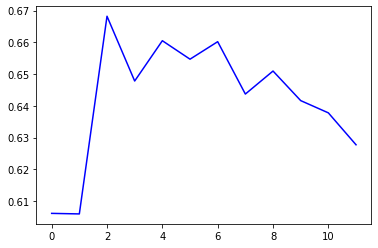

In [54]:
import matplotlib.pyplot as plt

plt.plot (means, color='blue', alpha=1.00)
plt.show()

In [55]:
#TEST ON YOUR TEST SET 
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)

In [56]:
#This is your prediction on the TEST SET
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [57]:
#EVALUATE YOUR PREDICTION (on the y_test that you left aside)
from sklearn import metrics 
print('***RESULTS ON TEST SET***')
print("precision: ", metrics.precision_score(y_test, y_pred)) # tp / (tp + fp)
print("recall: ", metrics.recall_score(y_test, y_pred)) # tp / (tp + fn)
print("f1_score: ", metrics.f1_score(y_test, y_pred)) #F1 = 2 * (precision * recall) / (precision + recall)
print("accuracy: ", metrics.accuracy_score(y_test, y_pred)) # (tp+tn)/m


***RESULTS ON TEST SET***
precision:  0.7312072892938497
recall:  0.620889748549323
f1_score:  0.6715481171548118
accuracy:  0.8604444444444445


In [58]:
#PRINT SOME FURTHER METRICS
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      3466
           1       0.73      0.62      0.67      1034

    accuracy                           0.86      4500
   macro avg       0.81      0.78      0.79      4500
weighted avg       0.85      0.86      0.86      4500



In [59]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[3230  236]
 [ 392  642]]


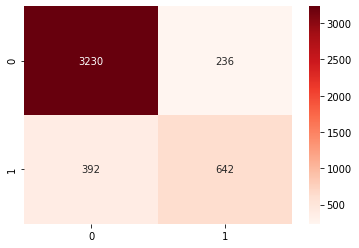

In [60]:
# Plot normalized confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Reds"); #annot=True to annotate cells fmt: format


### ROC Curve

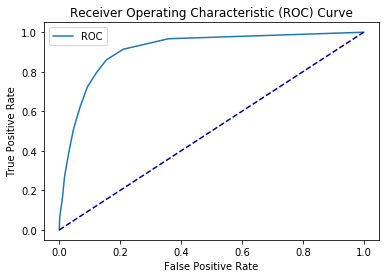

AUC: 0.91


In [76]:
model = KNeighborsClassifier(n_neighbors=11)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)

## Apply PCA

In [81]:
#PCA fit
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)
df_pca = pd.DataFrame(pca.transform(scaled_X))

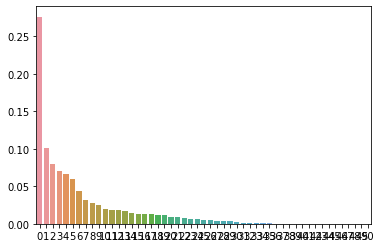

In [82]:
explained_variance=pd.DataFrame(pca.explained_variance_ratio_)
%matplotlib inline
import seaborn as sns
ax = sns.barplot( data=explained_variance.transpose())

In [65]:
pd.DataFrame(pca.components_,columns=X.columns)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,4.694619e-03,2.095256e-02,-8.241802e-02,-2.269947e-01,2.850766e-01,-3.546334e-01,-2.674595e-01,-3.132632e-02,-3.596241e-01,-3.473792e-01,...,0.090766,0.098693,-0.000548,-0.006290,0.015922,-0.001760,-0.007898,0.202241,-0.303360,0.216121
1,1.834855e-01,-7.183111e-03,-7.255592e-03,-2.844720e-01,2.525840e-01,-3.659265e-03,2.017997e-01,1.530395e-01,-2.210812e-02,-1.167394e-01,...,0.073155,0.099094,0.034223,-0.013968,-0.057367,0.023584,0.016801,0.064172,-0.224586,0.276005
2,3.451413e-01,6.096697e-03,-2.365838e-02,7.960304e-02,-4.739644e-02,-2.758471e-02,-1.780276e-01,9.222600e-03,-1.254765e-02,3.111668e-02,...,-0.020486,-0.021935,-0.037978,0.020518,0.016363,0.020373,-0.021249,0.027658,0.025448,-0.078635
3,1.832197e-02,-3.251716e-03,-2.868529e-04,6.996778e-02,-3.042863e-02,-3.975389e-02,-3.510342e-02,-6.659302e-02,-4.090210e-02,-2.084613e-02,...,-0.019990,-0.024763,0.016207,0.010637,-0.001940,-0.007878,-0.016685,0.033107,0.017480,-0.073144
4,7.001651e-02,-1.357492e-03,4.780388e-02,-3.184998e-01,1.301616e-01,2.192957e-01,1.321331e-01,3.118872e-01,2.197778e-01,1.488347e-01,...,0.039986,0.098929,-0.067430,-0.034024,0.012319,0.046324,0.040995,-0.167706,-0.056638,0.318948
5,-7.064035e-02,1.475287e-02,3.376576e-02,-1.190996e-01,9.840613e-02,5.634596e-02,1.481724e-01,-1.335170e-01,2.617183e-02,1.506368e-02,...,-0.048461,-0.001172,-0.024755,0.039366,0.029748,-0.048094,0.001582,0.007482,-0.079515,0.118383
6,7.026476e-02,-5.457873e-02,-7.162428e-02,9.042486e-02,-1.706662e-01,-1.170751e-01,-1.838525e-01,3.748122e-01,-6.341205e-02,-9.736526e-02,...,0.109246,0.075484,0.045994,-0.034069,-0.057755,0.024439,0.025247,-0.149548,0.175281,-0.080544
7,-2.550173e-02,-8.871146e-03,1.655376e-02,-1.135856e-02,5.516827e-02,5.005269e-02,5.271368e-02,-6.188407e-02,4.484758e-02,4.796292e-02,...,-0.029486,-0.039237,-0.025189,-0.018122,0.021048,0.006504,0.014530,0.066791,-0.059355,0.005376
8,-1.307152e-01,-7.224572e-03,-3.527606e-02,-1.404424e-02,-4.594962e-02,-4.865790e-02,-1.426206e-01,2.240905e-01,-4.253402e-02,-5.267918e-02,...,0.041978,0.044236,0.042816,-0.049311,-0.031507,0.032608,0.008265,-0.082772,0.058184,0.018186
9,-8.276065e-02,-1.123644e-01,-1.742157e-02,1.635056e-01,2.459258e-01,1.410571e-01,-4.591299e-02,1.314231e-01,1.799901e-01,1.829250e-01,...,-0.067952,-0.113987,0.093075,-0.123256,-0.078497,0.031542,0.084234,0.546812,-0.334544,-0.200690


In [83]:
X_pca = pd.DataFrame(data = pca.transform(X))

X_train_pca = pd.DataFrame(data = pca.transform(X_train))

X_test_pca = pd.DataFrame(data = pca.transform(X_test))


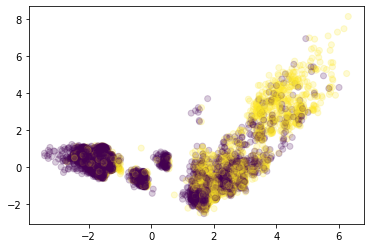

In [84]:
import matplotlib.pyplot as plt

x = X_train_pca.iloc[:,0]
y = X_train_pca.iloc[:,1]

plt.scatter(x, y,alpha=0.2,c=y_train )
plt.show()

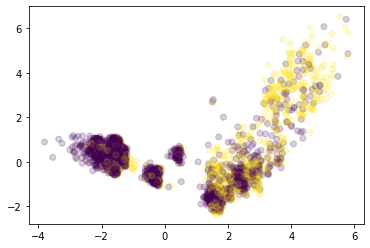

In [85]:
import matplotlib.pyplot as plt

x = X_test_pca.iloc[:,0]
y = X_test_pca.iloc[:,1]

plt.scatter(x, y,alpha=0.2,c=y_test )
plt.show()

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1591s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  10 out of  24 | elapsed:    0.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  11 out of  24 | elapsed:    0.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  12 out of  24 | elapsed:    0.4s

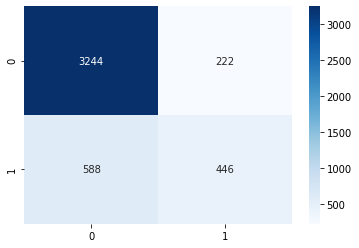

In [86]:
#DEFINE  PARAMETERS GRID
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
classifier = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(1,40,5)}
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=50, n_jobs=-1)
# We use just the two first PC
gs = gs.fit(X_train_pca.iloc[:,:2], y_train) 

#Prediction
print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test_pca.iloc[:,:2])

print("f1_score: ", metrics.f1_score(y_test, y_pred))
print("accuracy: ", metrics.accuracy_score(y_test, y_pred))

from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues"); #annot=True to annotate cells fmt: format


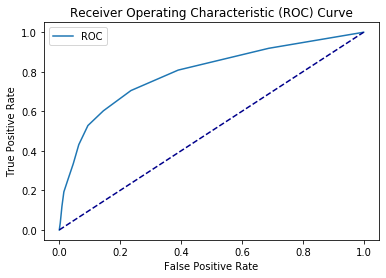

AUC: 0.79


In [87]:
#Using the two first PC
X_train_pca_2=X_train_pca.iloc[:,:2]
X_test_pca_2=X_test_pca.iloc[:,:2]

model = KNeighborsClassifier(n_neighbors=11)
model.fit(X_train_pca_2, y_train)
y_pred = model.predict(X_test_pca_2)

y_probs = model.predict_proba(X_test_pca_2) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)

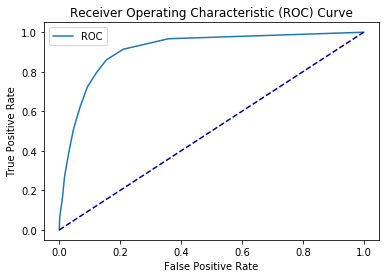

AUC: 0.91


In [88]:
# and with all PC

model = KNeighborsClassifier(n_neighbors=11)
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)

y_probs = model.predict_proba(X_test_pca) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)